In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


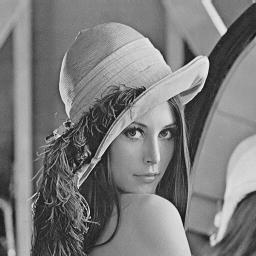

In [3]:
img1 = cv2.imread('/content/gdrive/My Drive/ColabIP/lena256.jpg')
RGB_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
cv2_imshow(gImg)
#plt.imshow(gImg1, cmap='gray')

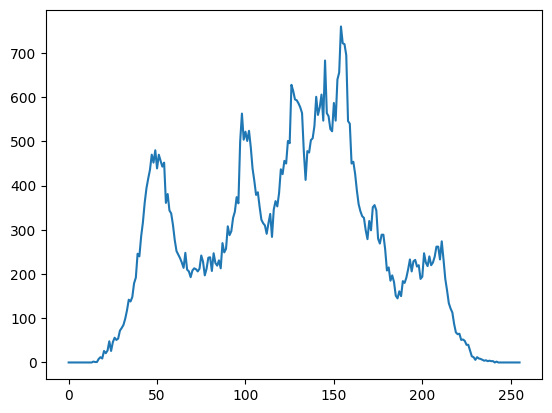

In [4]:
hist = cv2.calcHist([gImg], [0], None, [256], [0,256])
plt.plot(hist)

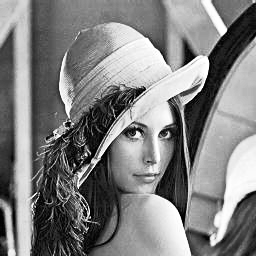

In [6]:
gOut = cv2.equalizeHist(gImg)
cv2_imshow(gOut)

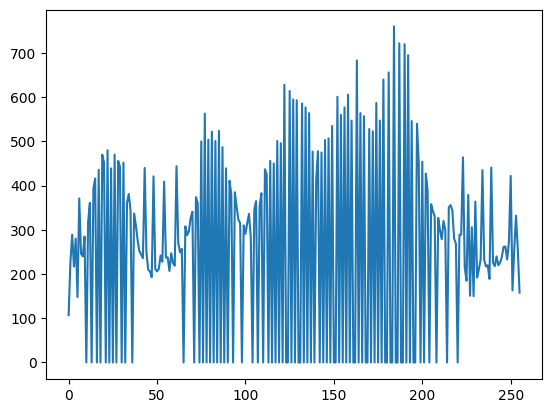

In [7]:
hist = cv2.calcHist([gOut], [0], None, [256], [0,256])
plt.plot(hist)

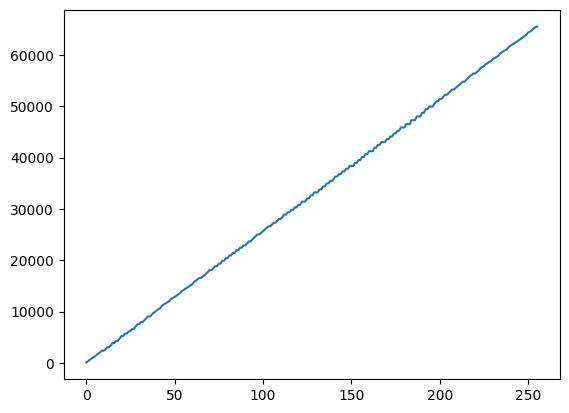

In [8]:
cumulHist = hist.copy()

for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + hist[i]

plt.plot(cumulHist)

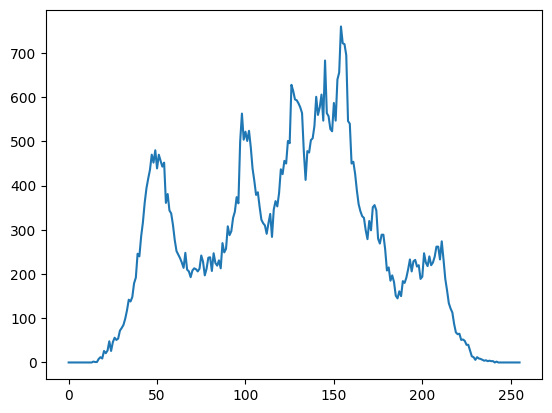

In [9]:
hist = cv2.calcHist([gImg], [0], None, [256], [0,256])
plt.plot(hist)

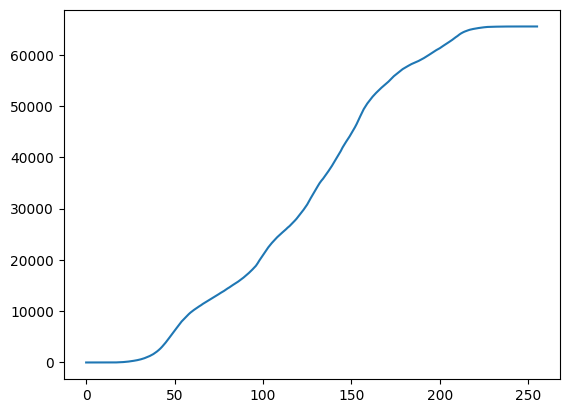

In [10]:
cumulHist = hist.copy()

for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + hist[i]

plt.plot(cumulHist)

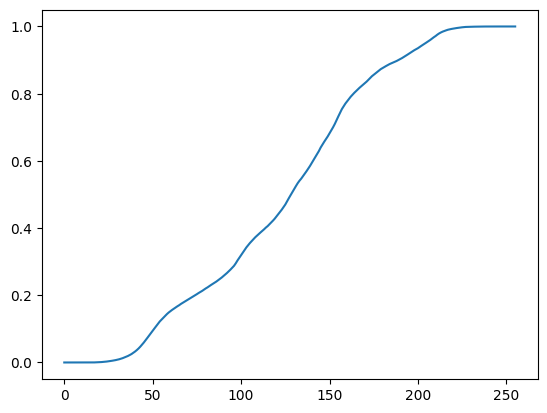

In [14]:
equalHist = cumulHist.copy()
num0fPixels = np.int32(gImg.shape[0]*gImg.shape[1])
equalHist = equalHist/num0fPixels

plt.plot(equalHist)

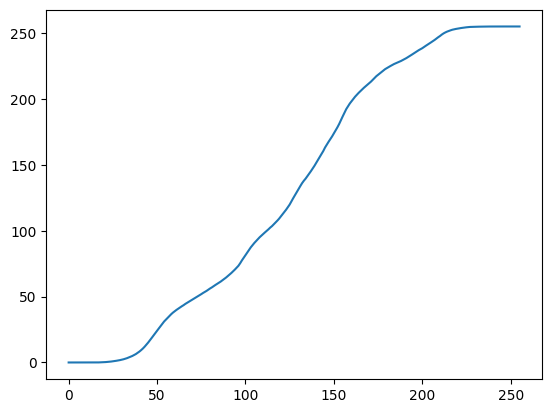

In [15]:
equalHist = equalHist * 255

plt.plot(equalHist)

<ipython-input-16-810690a02950>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gOut[h,w] = equalHist[gImg[h,w]]


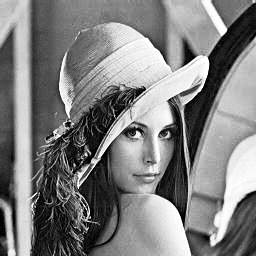

In [16]:
gOut = gImg.copy()

for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    gOut[h,w] = equalHist[gImg[h,w]]

cv2_imshow(gOut)

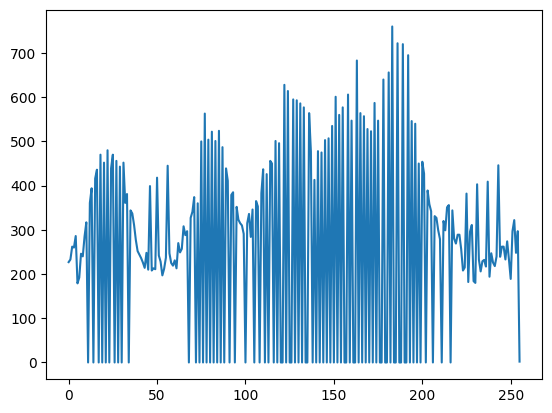

In [17]:
hist = cv2.calcHist([gOut], [0], None, [256], [0,256])
plt.plot(hist)

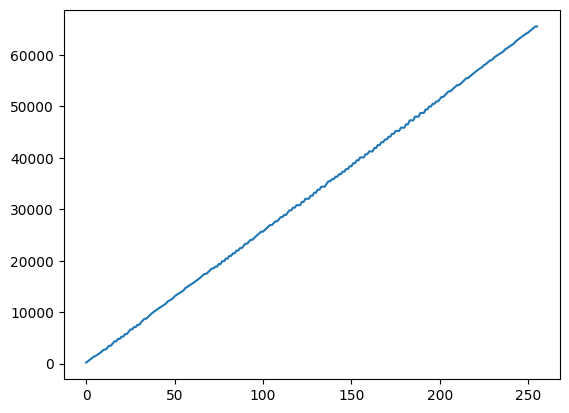

In [18]:
cumulHist = hist.copy()

for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + hist[i]

plt.plot(cumulHist)